# Exploring the Lorenz System of Differential Equations
`https://en.wikipedia.org/wiki/Lorenz_system

In this notebook, we will explore the Lorenz equations.

$$
x = \sigma(y-x) \\
y = \rho x-y -xz \\
z = -\beta z + xy \\
$$

In [1]:
%matplotlib inline

In [1]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Compute the Lorenz trajectories

In [3]:
def solve_lorenz(N=10.0, angle=0, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1], projection = '3d')
    ax.set_xlim((-25,25))
    ax.set_ylim((-25,25))
    ax.set_zlim((5,55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """
        Computes the time-derivative of a lorenz system
        
        returns a list of the values
        """
        x,y,z = x_y_z
        
        return [sigma * (y-x), x * (rho - z) - y, x * y - beta * z]
    
    # Choose some intial conditions (-15 to 15 with shap of N, 3)
    x0 = np.random.random((N, 3))
    
    # Solve for the trajectory
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t) for x0i in x0])
    
    # Choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))
    
    for i in range(N):
        x, y, z = x_t[i, :, :].T
        lines = ax.plot(x, y, z, '-', c = colors[i])
        plt.setp(lines, linewidth = 2)
        
    ax.view_init(30, angle)
    plt.show()
    
    return t, x_t
    
    

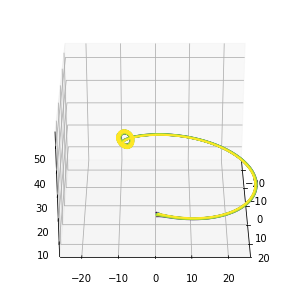

In [4]:
t, x_t = solve_lorenz(angle = 0, N =10)

In [5]:
w = interactive(solve_lorenz, angle=(0., 360.), max_time=(0.01, 100.), N=(0, 50), sigma = (0., 50.), rho = (0., 50.))

display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…